In [ ]:
import qiskit

In [ ]:
qiskit.__qiskit_version__

In [1]:
from qiskit import *  

In [2]:
from qiskit.circuit import Parameter 

In [14]:
qr = QuantumRegister(2)

In [15]:
cr = ClassicalRegister(2)

In [16]:
circuit = QuantumCircuit(qr,cr)

In [17]:
circuit.draw()

q1_0: 
      
q1_1: 
      
c1: 2/

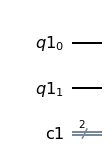

In [18]:
circuit.draw(output='mpl') 

In [19]:
parameter_theta = Parameter('θ[0]')
parameter_phi = Parameter('phi')
circuit.rz(theta = parameter_theta, qubit=0)
circuit.rz(theta = parameter_theta, qubit=1)

TypeError: rz() got an unexpected keyword argument 'theta'

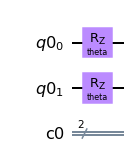

In [9]:
circuit.draw(output ='mpl')

In [10]:
circuit.rxx(phi,qubit1=0,qubit2=1)


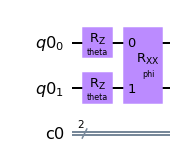

In [11]:
circuit.draw(output='mpl')


In [13]:
circuit.assign_parameters({'theta':3.1416/4, 'phi':0.1})

CircuitError: 'Cannot bind parameters (theta, phi) not present in the circuit.'